In [43]:
import numpy as np
import matplotlib.pyplot as plt

import jax
from functools import partial
import jax.numpy as jnp

plt.rcParams['figure.figsize'] = [12, 8] # PDF 

import time
from tqdm import tqdm

from Dynamics import logistic_map, henon_map
from Kernels import ext_kernel
from Losses import rho_comp

from Optimizer import main_flow, main_sos
from DataManager import get_curr_data, sample_points
from utils import get_predict_func, gen_traj, predict_series, get_pred_funcs, set_seed, hausdorff_distance, save_res, load_res
from notebook_utils import do_test, get_thetas

jax.config.update("jax_enable_x64", True)


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
set_seed(0)

x_vec_0 = [0.5, 1.5, 2.5]

traj_train = jnp.array(gen_traj(lorentz_map(), x_vec_0, 1000))

X_train = traj_train[:-1]
Y_train = traj_train[1:]

In [39]:
flow_para = {
    "lr": 0.3,
    "num_steps": 200
}

sos_para = {
    "N_samples": 200,
    "N_steps": 100,
    "lmbda": 1e-4,
    "eps": 1e-6,
    "sig": 1e-1
}

start_seed = 0

num_theta = 3
thetas_flow, losses_flow, thetas_sos, losses_sos = get_thetas(X_train, Y_train, start_seed, flow_para, sos_para, num_theta)


100%|█████████████████████████████████████████| 200/200 [02:39<00:00,  1.25it/s]


flow min 0.03713893397235557


100%|█████████████████████████████████████████| 100/100 [00:30<00:00,  3.33it/s]


found min 0.020122880713693947
sample min 0.020330782751292964


100%|█████████████████████████████████████████| 200/200 [02:35<00:00,  1.28it/s]


flow min 0.032822033019724084


100%|█████████████████████████████████████████| 100/100 [00:37<00:00,  2.67it/s]


found min 0.029706956321146727
sample min 0.0303399205182171


100%|█████████████████████████████████████████| 200/200 [02:48<00:00,  1.19it/s]


flow min 0.09506567704347646


100%|█████████████████████████████████████████| 100/100 [00:30<00:00,  3.25it/s]


found min 0.028590648240454097
sample min 0.029016845015219506


100%|█████████████████████████████████████████| 200/200 [02:51<00:00,  1.17it/s]


flow min 0.07381579626335166


100%|█████████████████████████████████████████| 100/100 [00:34<00:00,  2.90it/s]


found min 0.02920029050636186
sample min 0.029677780389450015


100%|█████████████████████████████████████████| 200/200 [02:43<00:00,  1.22it/s]


flow min 0.13854118801043258


100%|█████████████████████████████████████████| 100/100 [00:33<00:00,  2.97it/s]


found min 0.021838533035458796
sample min 0.0223176157493149


100%|█████████████████████████████████████████| 200/200 [02:37<00:00,  1.27it/s]


flow min 0.11646917560106185


100%|█████████████████████████████████████████| 100/100 [00:29<00:00,  3.35it/s]


found min 0.06500572695872453
sample min 0.0666347749294468


100%|█████████████████████████████████████████| 200/200 [02:36<00:00,  1.28it/s]


flow min 0.0570634778059671


100%|█████████████████████████████████████████| 100/100 [00:36<00:00,  2.74it/s]


found min 0.026208807868712714
sample min 0.026979276743804848


100%|█████████████████████████████████████████| 200/200 [02:46<00:00,  1.20it/s]


flow min 0.12718305365435278


100%|█████████████████████████████████████████| 100/100 [00:32<00:00,  3.05it/s]


found min 0.053066218235560125
sample min 0.05537393329837981


100%|█████████████████████████████████████████| 200/200 [02:48<00:00,  1.19it/s]


flow min 0.06817490518746461


100%|█████████████████████████████████████████| 100/100 [00:34<00:00,  2.91it/s]


found min 0.012766853296267033
sample min 0.013006999867427593


In [44]:
theta_res = {
    "thetas_flow": thetas_flow,
    "losses_flow": losses_flow,
    "thetas_sos": thetas_sos,
    "losses_sos": losses_sos
}

save_res("Lorentz", theta_res)

In [40]:
x_vec_0_test = [0.7, 1.1, 2.]


traj_test = jnp.array(gen_traj(lorentz_map(), x_vec_0_test, 1000))

X_test = traj_test[:-1]
Y_test = traj_test[1:]

In [41]:
eps = 1e-1

HD_losses_flow, deviate_steps_flow, mse_losses_flow = do_test(thetas_flow, x_vec_0_test, traj_test, X_train, Y_train, eps)
HD_losses_sos, deviate_steps_sos, mse_losses_sos = do_test(thetas_sos, x_vec_0_test, traj_test, X_train, Y_train, eps)

HD_losses_flow_train, deviate_steps_flow_train, mse_losses_flow_train = do_test(thetas_flow, x_vec_0_test, traj_train, X_train, Y_train, eps)
HD_losses_sos_train, deviate_steps_sos_train, mse_losses_sos_train = do_test(thetas_sos, x_vec_0_test, traj_train, X_train, Y_train, eps)


100%|███████████████████████████████████████| 1000/1000 [01:18<00:00, 12.69it/s]


In [46]:
test_flow_res = {
    "HD_losses_flow": HD_losses_flow,
    "deviate_steps_flow": deviate_steps_flow,
    "mse_losses_flow": mse_losses_flow
}

test_sos_res = {
    "HD_losses_sos": HD_losses_sos,
    "deviate_steps_sos": deviate_steps_sos,
    "mse_losses_sos": mse_losses_sos
}

save_res("Lorentz", test_flow_res)
save_res("Lorentz", test_sos_res)

In [ ]:
test_train_flow_res = {
    "HD_losses_flow_train": HD_losses_flow_train,
    "deviate_steps_flow_train": deviate_steps_flow_train,
    "mse_losses_flow_train": mse_losses_flow_train
}

test_train_sos_res = {
    "HD_losses_sos_train": HD_losses_sos_train,
    "deviate_steps_sos_train": deviate_steps_sos_train,
    "mse_losses_sos_train": mse_losses_sos_train
}

save_res("Lorentz", test_train_flow_res)
save_res("Lorentz", test_train_sos_res)

# Y.idx 0

In [29]:
y_idx = 0

lr = 0.3
num_steps = 200
losses_flow_0, theta_star_flow_0 = main_flow(y_idx, ext_kernel, X_batch, y_batch, X_sub, y_sub, lr, num_steps)


seed=2
N=100 
lmbda=1e-4 
eps=1e-6
sig=1e-1
losses_sos_0, theta_star_sos_0 = main_sos(y_idx, ext_kernel, X_batch, y_batch, X_sub, y_sub, seed, N, lmbda, eps, sig)


100%|█████████████████████████████████████████| 200/200 [03:42<00:00,  1.11s/it]


flow min 0.043984938575494015


100%|█████████████████████████████████████████| 100/100 [02:02<00:00,  1.23s/it]


found min 0.020122880713693947
sample min 0.020330782751292964


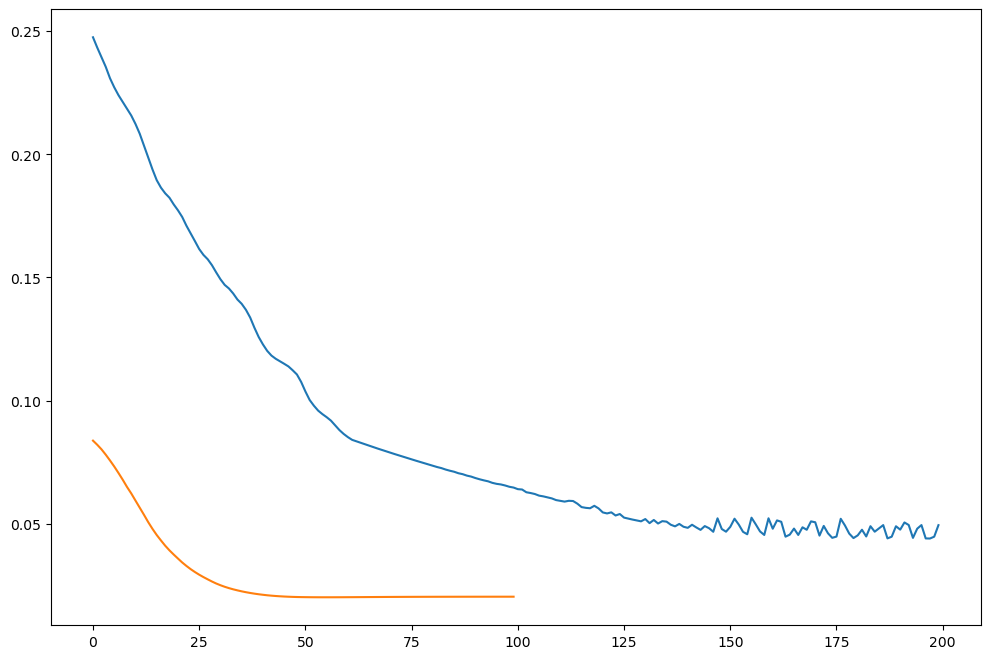

In [30]:
plt.plot(losses_flow_0)
plt.plot(losses_sos_0)

# Y.idx 1

In [31]:
y_idx = 1

lr = 0.3
num_steps = 200
losses_flow_1, theta_star_flow_1 = main_flow(y_idx, ext_kernel, X_batch, y_batch, X_sub, y_sub, lr, num_steps)


seed=2
N=100 
lmbda=1e-4 
eps=1e-6
sig=1e-1
losses_sos_1, theta_star_sos_1 = main_sos(y_idx, ext_kernel, X_batch, y_batch, X_sub, y_sub, seed, N, lmbda, eps, sig)


100%|█████████████████████████████████████████| 200/200 [10:11<00:00,  3.06s/it]


flow min 0.07295869615924977


100%|███████████████████████████████████████| 100/100 [1:01:03<00:00, 36.64s/it]

found min 0.02727438220533862
sample min 0.027597162828506328


In [33]:
plt.plot(losses_flow_1)
plt.plot(losses_sos_1)

NameError: name 'losses_flow_1' is not defined

# Y.idx 2

In [32]:
y_idx = 2

lr = 0.3
num_steps = 200
losses_flow_2, theta_star_flow_2 = main_flow(y_idx, ext_kernel, X_batch, y_batch, X_sub, y_sub, lr, num_steps)


seed=2
N=100 
lmbda=1e-4 
eps=1e-6
sig=1e-1
losses_sos_2, theta_star_sos_2 = main_sos(y_idx, ext_kernel, X_batch, y_batch, X_sub, y_sub, seed, N, lmbda, eps, sig)


100%|█████████████████████████████████████| 200/200 [10:52:48<00:00, 195.84s/it]


flow min 0.08697626134801972


100%|█████████████████████████████████████████| 100/100 [00:24<00:00,  4.13it/s]

found min 0.028375129188414228
sample min 0.028794829651503706


In [ ]:
plt.plot(losses_flow_2)
plt.plot(losses_sos_2)

# Assessment

In [13]:
# x_vec_0_test = [0.5, 1.5, 2.5]

x_vec_0_test = [0.7, 1.1, 2.]


traj_test = jnp.array(gen_traj(lorentz_map(), x_vec_0_test, 1000))

X_test = traj_test[:-1]
Y_test = traj_test[1:]

In [14]:
thetas_flow = jnp.array([theta_star_flow_0, theta_star_flow_1, theta_star_flow_2])
thetas_sos = jnp.array([theta_star_sos_0, theta_star_sos_1, theta_star_sos_2])

pred_funcs_flow = get_pred_funcs(thetas_flow, ext_kernel, X_train, Y_train)
pred_funcs_sos = get_pred_funcs(thetas_sos, ext_kernel, X_train, Y_train)

# Autoregressive

In [15]:
traj_preds_flow = predict_series(pred_funcs_flow, jnp.array(x_vec_0_test), 1000)
traj_preds_sos = predict_series(pred_funcs_sos, jnp.array(x_vec_0_test), 1000)

100%|███████████████████████████████████████| 1000/1000 [01:10<00:00, 14.11it/s]


In [16]:
print("flow", np.std(np.linalg.norm((traj_test - traj_preds_flow), axis=1)))
print("sos", np.std(np.linalg.norm((traj_test - traj_preds_sos), axis=1)))

flow 8.550943558723583
sos 11.800751719424547


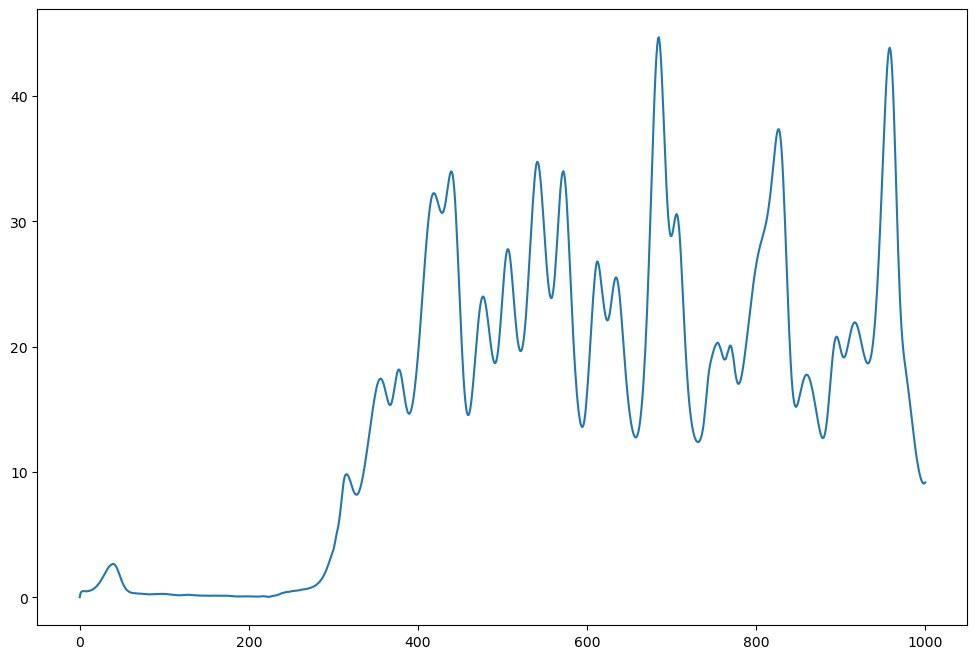

In [17]:
diff = np.linalg.norm((traj_test - traj_preds_sos), axis=1)

plt.plot(diff)
plt.show()

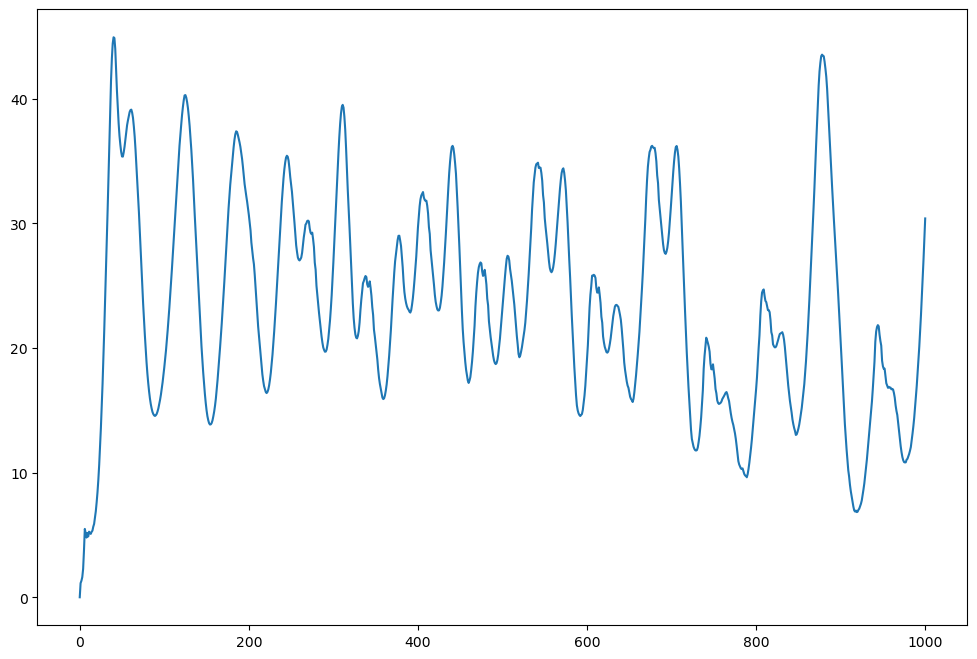

In [18]:
diff = np.linalg.norm((traj_test - traj_preds_flow), axis=1)

plt.plot(diff)
plt.show()

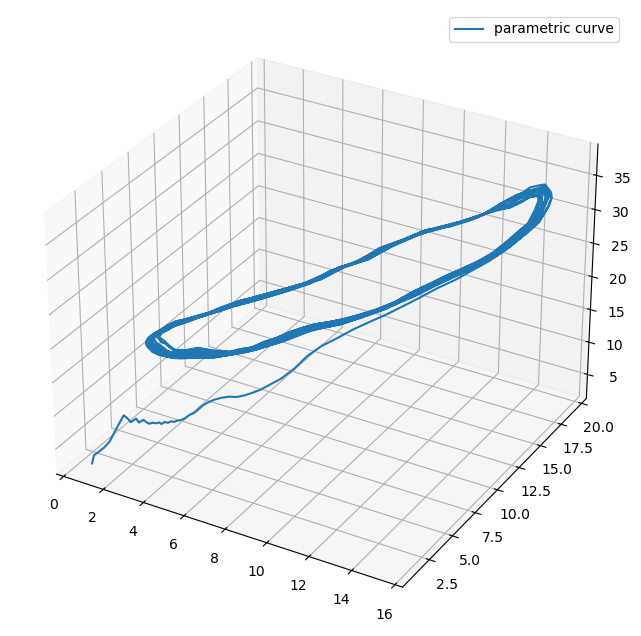

In [19]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(traj_preds_flow[:, 0], traj_preds_flow[:, 1], traj_preds_flow[:, 2], label='parametric curve')
ax.legend()

plt.show()

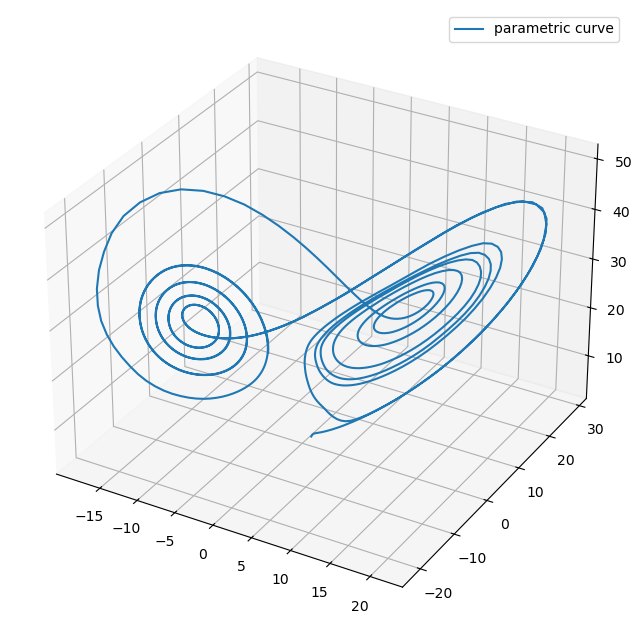

In [20]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(traj_preds_sos[:, 0], traj_preds_sos[:, 1], traj_preds_sos[:, 2], label='parametric curve')
ax.legend()

plt.show()

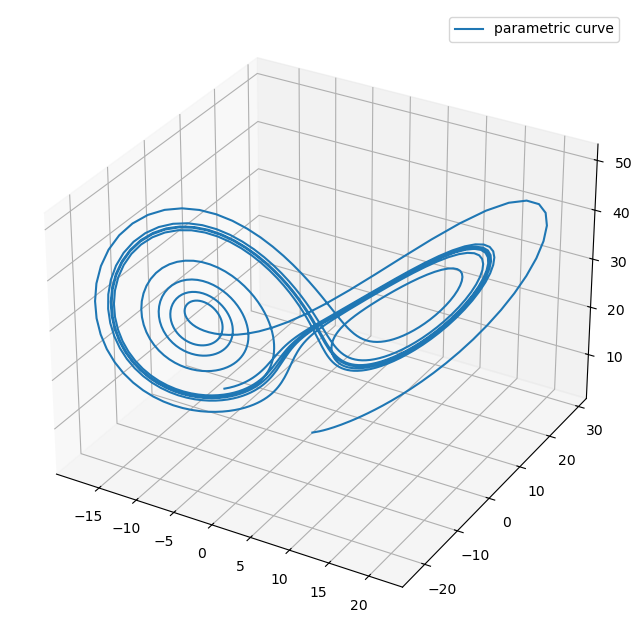

In [21]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(traj_test[:, 0], traj_test[:, 1], traj_test[:, 2], label='parametric curve')
ax.legend()

plt.show()

# Non-Autoregressive

In [22]:
res_flow = []
res_sos = []
for x in tqdm(X_test):
    curr_res_flow = []
    curr_res_sos = []
    for k in range(3):
        curr_res_flow.append(pred_funcs_flow[k](x))
        curr_res_sos.append(pred_funcs_sos[k](x))
    res_flow.append(curr_res_flow)
    res_sos.append(curr_res_sos)
    
res_flow = jnp.array(res_flow)
res_sos = jnp.array(res_sos)

print("sos", jnp.mean(jnp.linalg.norm(res_sos - Y_test, axis=1)))
print("flow", jnp.mean(jnp.linalg.norm(res_flow - Y_test, axis=1)))



100%|███████████████████████████████████████| 1000/1000 [02:35<00:00,  6.45it/s]


sos 0.11963649834634703
flow 0.4618089437499723


In [24]:
hausdorff_distance(traj_test, traj_preds_sos)

Array(6.41375219, dtype=float64)

In [25]:
hausdorff_distance(traj_test, traj_preds_flow)

Array(32.59896254, dtype=float64)